# 데이터시각화특강 기말평가 답안 (문제5)
## 202055364 황성윤

## 5. 정권별 GDP/소득불균형 시각화 (20점)

아래는 한 가상국가의 최근 18년간 GDP와 불평등지수이다.

In [1]:
import pandas as pd
import numpy as np
import folium
import json
import requests
import plotly.express as px
from IPython.display import HTML

In [2]:
pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df1.csv')

,GDP,Inequality,Government
0,500,56,A
1,550,58,A
2,530,59,A
3,480,61,A
4,550,64,A
5,550,64,B
6,750,66,B
7,560,68,B
8,800,70,B
9,900,65,B


그리고 아래는 각 정권별 평균 인구수를 기록한 것이다. (단위천)

In [4]:
pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df2.csv',index_col=0)

,A,B,C,D
pop,54232.213,48823.432,46823.453,45232.119


`(1)` 정권의 GDP와 불평등지수를 시각화하고 정권은 색깔별로 구분하라. 선의 두께는 인구수에 따라 다르게 나타내라. 시각화 예시는 아래와 같다.

In [5]:
df1=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df1.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df2.csv',index_col=0)

In [6]:
from plotnine import *

In [7]:
df2.melt().rename(columns={'variable':'Government','value':'pop'})

,Government,pop
0,A,54232.213
1,B,48823.432
2,C,46823.453
3,D,45232.119


In [8]:
df3=pd.merge(df1,df2.melt().rename(columns={'variable':'Government','value':'pop'}))
df3

,GDP,Inequality,Government,pop
0,500,56,A,54232.213
1,550,58,A,54232.213
2,530,59,A,54232.213
3,480,61,A,54232.213
4,550,64,A,54232.213
5,550,64,B,48823.432
6,750,66,B,48823.432
7,560,68,B,48823.432
8,800,70,B,48823.432
9,900,65,B,48823.432


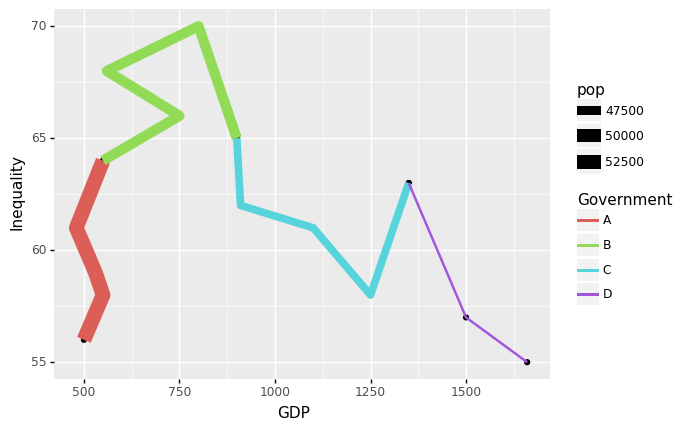

<ggplot: (97114859430)>

In [9]:
ggplot(df3)+geom_point(aes(x='GDP',y='Inequality'))+\
geom_path(aes(x='GDP',y='Inequality',size='pop',color='Government'))

`(2)` 정권 A,C는 진보성향의 정권이며 정권 B,D는 보수성향의 정권이다. 아래의 데이터프레임을 이용하여 적절한 tidyset을 새로 만들고 정권의 성향을 선의 타입으로 나타내라.

In [10]:
pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df3.csv',index_col=0)

,type
A,prog
B,cons
C,prog
D,cons


In [11]:
df4=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/gdp_df3.csv',index_col=0)

In [12]:
df5=pd.merge(df3,df4.reset_index().rename(columns={'index':'Government'}))
df5

,GDP,Inequality,Government,pop,type
0,500,56,A,54232.213,prog
1,550,58,A,54232.213,prog
2,530,59,A,54232.213,prog
3,480,61,A,54232.213,prog
4,550,64,A,54232.213,prog
5,550,64,B,48823.432,cons
6,750,66,B,48823.432,cons
7,560,68,B,48823.432,cons
8,800,70,B,48823.432,cons
9,900,65,B,48823.432,cons


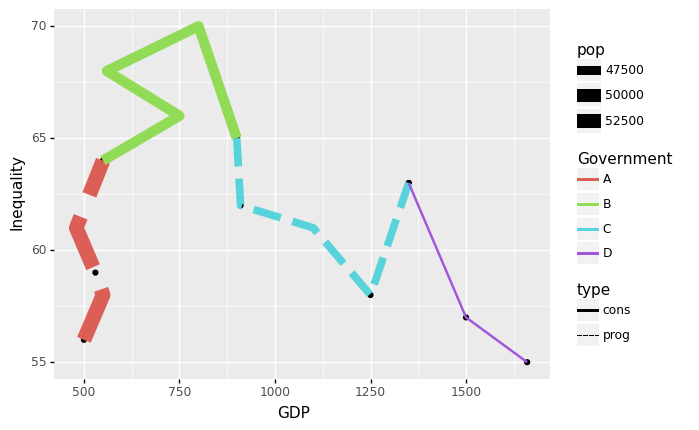

<ggplot: (97114880250)>

In [13]:
ggplot(df5)+geom_point(aes(x='GDP',y='Inequality'))+\
geom_path(aes(x='GDP',y='Inequality',size='pop',color='Government',linetype='type'))